In [19]:
import pandas as pd
df = pd.read_csv("ECom_Shiping.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score
import matplotlib.pyplot as plt

In [21]:
# Assuming you have a DataFrame called 'data' with the independent and dependent variables
X = df[['Weight_in_gms', 'Product_importance', 'Cost_of_the_Product', 'Customer_rating', 'Customer_care_calls', 'Mode_of_Shipment']]
y = df['Reached.on.Time_Y.N']

In [22]:
# Encode categorical variables
label_encoder = LabelEncoder()
X_encoded = X.copy()
X_encoded['Product_importance'] = label_encoder.fit_transform(X['Product_importance'])
X_encoded['Mode_of_Shipment'] = label_encoder.fit_transform(X['Mode_of_Shipment'])

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [24]:
# Create a Naive Bayes classifier
nb_clf = GaussianNB()

In [25]:
# Train the Naive Bayes classifier
nb_clf.fit(X_train, y_train)

GaussianNB()

In [26]:
# Make predictions on the test set
y_pred = nb_clf.predict(X_test)

In [27]:
# Evaluate the accuracy of the Naive Bayes classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6386363636363637


In [28]:
# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[ 345  550]
 [ 245 1060]]


In [29]:
# Calculate the AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

AUC: 0.5988676983668315


In [30]:
# Calculate the F1 score
f1_score_value = f1_score(y_test, y_pred)
print("F1 Score:", f1_score_value)

F1 Score: 0.7272727272727273


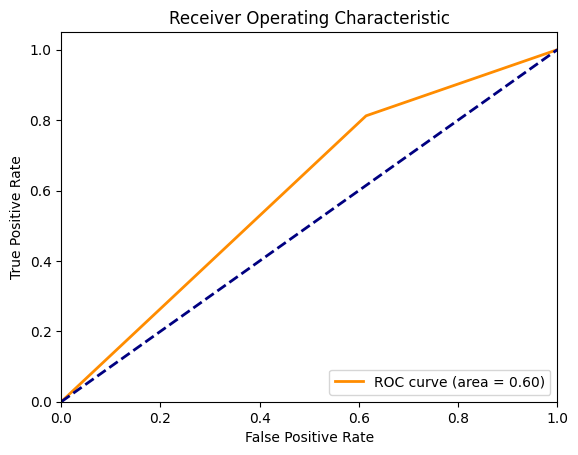

In [31]:
# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()